<img src="https://electronaut.info/wp-content/uploads/2017/05/Tubescape_jupyter2.jpg">

<h1><font color = b30000>TUBE DATA MATCHER for uTRACER FILES</font></h1><h5>Anode current for a sweep of grid voltages  when anode voltage = constant</h5>


# STEP 1 — Import and process tube data, build dataframe.

In [1]:
from ElectronauTracer_Importer import *
df.head()

Please enter the path to the folder containing the uTracer files: /Users/rrmc/Desktop/burnedintubes

What type of tubes are these? 5749

— — — — — 

Data from 63 tubes of type 5749 was successfully read.
A dataframe containing all 63 tubes was successfully created.


,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,356,5749,325,77.778,47.335,30.168,22.012,16.393,12.337,9.368,7.198,5.658,4.611,3.897,3.394,3.007
1,364,5749,325,78.269,47.972,30.718,22.443,16.722,12.537,9.49,7.301,5.76,4.715,3.994,3.433,2.968
2,366,5749,325,67.519,40.803,25.132,18.204,13.541,10.067,7.483,5.589,4.224,3.3,2.709,2.323,2.033
3,377,5749,325,83.153,52.089,34.211,25.271,19.126,14.664,11.437,9.077,7.391,6.182,5.299,4.613,4.043
4,387,5749,325,76.167,45.68,28.812,21.154,15.813,11.907,9.048,6.974,5.523,4.541,3.851,3.321,2.896



# STEP 2: Show the statistics of the tube data set

In [2]:
# For some reason, .describe is requiring .astype(float) in order to show the stats.
df_stats = df.astype(float).describe()
df_stats.loc[:, 'tube_type'] = df_stats.loc[:, 'tube_type'].astype(int)
df_stats.loc[:, 'tube_ID'] = df_stats.loc[:, 'tube_ID'].astype(int)
df_stats

,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
count,63,63,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,599,5749,325.0,69.768286,41.715873,25.935048,18.650159,13.786270,10.241032,7.650603,5.774238,4.447063,3.539524,2.916413,2.465048,2.123222
std,145,0,0.0,8.408693,6.131187,4.765722,3.825158,3.081033,2.517737,2.086078,1.755510,1.500698,1.301283,1.137565,0.998755,0.879118
min,356,5749,325.0,52.903000,29.836000,16.593000,10.991000,7.715000,5.423000,3.796000,2.628000,1.744000,1.192000,0.887000,0.710000,0.595000
25%,480,5749,325.0,63.000500,37.449000,22.657000,15.844000,11.385000,8.242000,6.057000,4.485000,3.342500,2.566500,2.061500,1.739000,1.488000
50%,583,5749,325.0,68.350000,39.813000,24.953000,18.099000,13.490000,10.067000,7.462000,5.584000,4.253000,3.450000,2.897000,2.497000,2.149000
75%,750,5749,325.0,76.141500,46.680000,29.839500,21.820500,16.237000,12.142500,9.126500,7.007000,5.529500,4.485000,3.626500,2.969000,2.517000
max,799,5749,325.0,89.376000,54.870000,35.920000,26.696000,20.452000,15.868000,12.492000,9.962000,8.086000,6.721000,5.731000,4.969000,4.335000


# STEP 3: Plot a graph of all tubes


In [3]:
# Plot a line graph of all tubes

from bokeh.plotting import figure, output_file, show

output_file("Tube_Batch_Statistics.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df_stats.columns)
stats_columns = []
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

# Add all rows of tubes
for i in range(len(df.index)):
    row = df.iloc[i]
    row = list(row)
    row = row[3:]
    p.line(x_values, row, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 4: Show the distribution of a single bias voltage


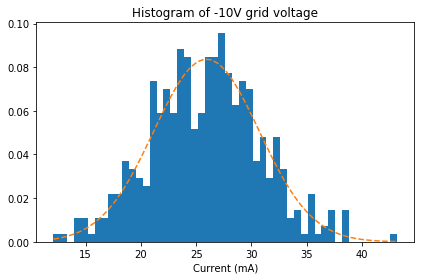

In [4]:
# Histogram of a single column

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

sigma = df_stats.iat[2, 5]
mu = df_stats.iat[1, 5]
x = mu + sigma  * np.random.randn(437)
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Current (mA)')
# ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of -10V grid voltage')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# STEP 5: Calculate the differences between all tubes

In [5]:
from ipywidgets import FloatProgress
from IPython.display import display
import time

start_time = time.time() 

def build_difference_df(df, df_stats):
    
    # Display a progress bar
    build_diff_progress_bar = FloatProgress(min=0, max=100)
    display(build_diff_progress_bar)
       
    # Make a list of all the columns in the dataframe
    cols = list(df.columns)
    
    # Make a list of just the bias columns (*** Should re-write this as a list comprehension)    
    bias_list = []
    for i in cols:
        if i.startswith('Bias_') == True:
            bias_list.append(i)
    
    # Make an empty list to hold the calculated values, to be used to build the difference dataframe
    diff_squared_list = []
    
    # Iterate through the index of tubes in the master dataframe to select a reference tube
    for each_ref_tube in df.index:
        
        # Get the next reference tube data, as a series
        ref_tube = df.iloc[each_ref_tube]
        ref_tube_ID = ref_tube.tube_ID

        # Iterate through the index of tubes in the master dataframe to select a match tube
        for each_match_tube in df.index:
            
            # Get the next tube data to be compared, as a series
            match_tube = df.iloc[each_match_tube]
            match_tube_ID = match_tube.tube_ID
            
            # Dictionary container to hold the difference variables for each tube
            temp_dict = {}
            
            # Compute the squares of the differences in each current measurement
            error_sum = 0
            for bias in enumerate(bias_list):
                mismatch = ((float(match_tube.loc[bias[1]]) - float(ref_tube.loc[bias[1]]))**2)
                temp_dict[bias[1]] = mismatch
                error_sum = error_sum + mismatch

            # Add other relevant key/value pairs to the dictionary  
            temp_dict['ref_tube_ID'] = ref_tube_ID
            temp_dict['match_tube_ID'] = match_tube_ID
            temp_dict['error_sum'] = error_sum

            # Append the tube's calculated values to the diff_squared_list
            diff_squared_list.append(temp_dict)
            
            # Update the progress bar
            build_diff_progress_bar.value += 1

    
    # Make an ordered list for the columns of the new difference dataframe
    new_cols_to_add = ['ref_tube_ID', 'match_tube_ID', 'error_sum']
    df_dif_cols = new_cols_to_add + bias_list
    df_dif = pd.DataFrame(diff_squared_list, columns = df_dif_cols)

    return df_dif
    
    
df_dif = build_difference_df(df, df_stats)

# Produce a brief report:
total_rows = len(df_dif)
total_columns = len(df_dif.columns)
total_datapoints = total_rows * total_columns
stop_time = time.time()
elapsed_time = stop_time - start_time
print("It took", round(elapsed_time, 2), "seconds to calculate", 
      total_datapoints, "values, resulting in", len(df_dif), "rows.")

# Display the head of the difference dataframe
df_dif.head()

FloatProgress(value=0.0)

It took 3.64 seconds to calculate 63504 values, resulting in 3969 rows.


,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,356,356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,356,364,1.342516,0.241081,0.405769,0.302500,0.185761,0.108241,0.040000,0.014884,0.010609,0.010404,0.010816,0.009409,0.001521,0.001521
2,356,366,214.487313,105.247081,42.667024,25.361296,14.500864,8.133904,5.152900,3.553225,2.588881,2.056356,1.718721,1.411344,1.147041,0.948676
3,356,377,109.149882,28.890625,22.600516,16.345849,10.621081,7.469289,5.414929,4.280761,3.530641,3.003289,2.468041,1.965604,1.485961,1.073296
4,356,387,8.626013,2.595321,2.739025,1.838736,0.736164,0.336400,0.184900,0.102400,0.050176,0.018225,0.004900,0.002116,0.005329,0.012321


# STEP 6: Find the best matches for a particular tube_ID

In [6]:
# This function requires the tube_to_match and tube_set_size variable to be set manually, below.

def find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size):
    tube_to_match = str(tube_to_match)
    
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif[(df_dif.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(tube_set_size)
    
    return df_tube_set

tube_to_match = 460
tube_set_size = 2
df_tube_set = find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size)
df_tube_set.head(tube_set_size)


,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50


# STEP 7:  Build a dataframe of the best matched sets in order

In [7]:
# math lib used for generating ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
import math

# Make a local version of df_dif that can be butchered
df_dif_copy = df_dif.copy()

def ask_tube_set_size():
    
    # Ask the user to enter the set size
    tube_set_size = input("Please enter the number of tubes per matched set:")
    
    # Build a list of tube names for the tube set size
    tube_sets_columns = ['Tube_' + str(1 + i) for i in range(int(tube_set_size))]    
    
    return tube_set_size, tube_sets_columns 


def find_best_set_for_chosen_tube_ID(df_dif_copy, tube_to_match, tube_set_size, tube_sets_columns):
    tube_to_match = str(tube_to_match)
        
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif_copy[(df_dif_copy.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(int(tube_set_size))
        
    # Create the dictionary of the tubes in the set and the total score of the set
    tube_set_list = list(df_tube_set.match_tube_ID)
    tube_set_dict = dict(zip(tube_sets_columns, tube_set_list))   
    tube_set_score = df_tube_set.error_sum.sum()
    tube_set_dict.update({'tube_set_score':tube_set_score})

    return tube_set_dict


def find_best_set(df_dif_copy, tube_set_size, tube_sets_columns):
    
    # Make an empty list to hold the tube sets and their scores
    tube_sets_and_scores_list = []
    temp_dict = {}
    
    if 'tube_set_score' in tube_sets_columns:
        tube_sets_columns.remove('tube_set_score')

    for i in df_dif_copy.ref_tube_ID.unique():
        temp_dict = find_best_set_for_chosen_tube_ID(df_dif_copy, i, tube_set_size, tube_sets_columns)
        tube_sets_and_scores_list.append(temp_dict)

    # Add 'tube_set_score' column name at the front of the list
    if 'tube_set_score' not in tube_sets_columns: 
        tube_sets_columns.insert(0, 'tube_set_score')    
    
    # Create a dataframe for the tube sets called df_tube_sets 
    df_tube_sets = pd.DataFrame(tube_sets_and_scores_list, columns=tube_sets_columns)
    
    # Sort the tube_set_score column, take the top row (with the lowest score) as a new df 
    df_best_set_temp = df_tube_sets.sort_values('tube_set_score').head(1)
        
    return df_best_set_temp
 
    
# Start a timer
start_time = time.time()   
    
# Make an empty dataframe to hold all the sets and their scores
df_best_tube_sets = pd.DataFrame()

# Get the tube_set_size and the tube_sets_columns from the ask_tube_set_size function
tube_set_size, tube_sets_columns = ask_tube_set_size()

# Get the best tube set from the batch
df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns) 

# Display a progress bar
progress_bar_range = int(len(df)/int(tube_set_size))
best_matched_progress_bar = FloatProgress(min=0, max=progress_bar_range)
display(best_matched_progress_bar)

# Append the best tube set to the df_best_tube_sets dataframe
df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

# Remove the best tube set from df_dif_copy
tube_delete_list = list(df_best_set_temp.iloc[0])
tube_delete_list.pop(0)
df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]

# A function to generate ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
ordinal_list = [ordinal(n) for n in range(1, int(len(df)))]

set_count = 1
print()
print("*** BEST! ***")
print(ordinal_list[0],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
print("TUBES:", tube_delete_list)

# Update the progress bar
best_matched_progress_bar.value += 1


while len(df_dif_copy.ref_tube_ID.unique()) >= int(tube_set_size):

    # Get all the rest of the sets from the batch
    df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns)
    
    # Append the best tube set to the df_best_tube_sets dataframe
    df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

    # Remove the best tube set from df_dif_copy
    tube_delete_list = list(df_best_set_temp.iloc[0])
    tube_delete_list.pop(0)

    df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
    df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]
    print()
    print(ordinal_list[set_count],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
    print("TUBES:", tube_delete_list)

    set_count += 1
    
    # Update the progress bar
    best_matched_progress_bar.value += 1


stop_time = time.time()
elapsed_time = stop_time - start_time
print()
print("It took", round(elapsed_time, 2), "seconds to produce", set_count, "tube sets.")

best_set = list(df_best_tube_sets.iloc[0])[1:]
worst_set = df_best_tube_sets.tail(1)
worst_set = list(worst_set.iloc[0])[1:]

Please enter the number of tubes per matched set:16


FloatProgress(value=0.0, max=3.0)


*** BEST! ***
1st best tube set SCORE: 129.317067
TUBES: ['445', '710', '435', '745', '417', '774', '770', '598', '574', '476', '799', '366', '769', '509', '786', '522']

2nd best tube set SCORE: 161.654292
TUBES: ['514', '356', '480', '794', '530', '364', '387', '662', '485', '389', '482', '788', '702', '791', '779', '421']

3rd best tube set SCORE: 422.284865
TUBES: ['583', '571', '783', '676', '481', '402', '524', '790', '464', '506', '707', '585', '528', '536', '675', '649']

It took 3.48 seconds to produce 3 tube sets.


In [11]:
# Display the matched tube sets as a dataframe
df_best_tube_sets.sort_values('tube_set_score').head(15)

,tube_set_score,Tube_1,Tube_2,Tube_3,Tube_4,Tube_5,Tube_6,Tube_7,Tube_8,Tube_9,Tube_10,Tube_11,Tube_12,Tube_13,Tube_14,Tube_15,Tube_16
10,129.317067,445,710,435,745,417,774,770,598,574,476,799,366,769,509,786,522
16,161.654292,514,356,480,794,530,364,387,662,485,389,482,788,702,791,779,421
13,422.284865,583,571,783,676,481,402,524,790,464,506,707,585,528,536,675,649


# STEP 8:  Figure out the optimal arrangement of the best set

In [182]:
## Build a dictionary containing the average currents for all the bias voltages

# make a df containing only the best set
best_set_df = df.loc[best_set]
best_set_df.head(4)

best_set_Iavg = {}

# A function to get the average current for all tubes in the set for a specified bias voltage
def get_Iavg(best_set_df, bias_name):
    best_setlist = [float(x) for x in ((best_set_df[bias_name]).tolist())]
    average_current = sum(best_setlist)/(len(best_setlist))
    return(bias_name, average_current)

# Iterate through the bias voltages and call the function to calculate the average currents
for i in bias_voltages:
    results = get_Iavg(best_set_df, i)
    bias_name = results[0]
    current_val = [results[1]]
    best_set_Iavg[bias_name] = current_val
    
best_set_Iavg    

{'Bias_10': [23.830249999999996],
 'Bias_14': [16.911],
 'Bias_18': [12.34],
 'Bias_2': [66.68418750000001],
 'Bias_22': [9.0145],
 'Bias_26': [6.6129375],
 'Bias_30': [4.89225],
 'Bias_34': [3.6875625000000003],
 'Bias_38': [2.8750625000000003],
 'Bias_42': [2.3339374999999998],
 'Bias_46': [1.954],
 'Bias_50': [1.671125],
 'Bias_6': [39.08862499999999]}

In [ ]:
# Build a dataframe showing the errors of each combination, relative to the averages for each bias voltage.

# STEP 8: Plot a line graph of the best set


In [8]:
# Plot a line graph of the best set

from bokeh.plotting import figure, output_file, show

output_file("Best Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(best_set)):
    row = df[df['tube_ID'] == best_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

# STEP 9: Plot a line graph of the worst set


In [9]:
# Plot a line graph of the worst set

from bokeh.plotting import figure, output_file, show

output_file("Worst Matched Tube Set.html")

# Configure the size, title, etc.
p = figure(plot_width=1000, plot_height=750, title="Plate Current as a function of Grid Voltage")
p.title.text_color = "black"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
temp_columns = list(df.columns)
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

for i in range(len(worst_set)):
    row = df[df['tube_ID'] == worst_set[i]]
    y_values = row.values.tolist()[0][3:]
    p.line(x_values, y_values, line_width=2)

# Set axis labels
p.xaxis.axis_label = "Grid Voltage (V)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Plate Current (mA)"

# Set grid lines
p.ygrid.minor_grid_line_color = 'navy'
p.ygrid.minor_grid_line_alpha = 0.2
p.xgrid.minor_grid_line_color = 'navy'
p.xgrid.minor_grid_line_alpha = 0.2

# Set background color
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# Show the plot
show(p)

### Everything below this line is experimental

In [10]:
df_best_tube_sets.tube_set_score[:15].describe()


count      3.000000
mean     237.752075
std      160.625923
min      129.317067
25%      145.485680
50%      161.654292
75%      291.969579
max      422.284865
Name: tube_set_score, dtype: float64

In [ ]:
import seaborn as sns
sns.set()

df_sns = df_best_tube_sets[['tube_set_score']][:15].copy()

sns.pairplot(df_sns, 'tube_set_score')
sns.plt.show()


In [ ]:
from bokeh.charts import Histogram, output_file, show

p = Histogram(df_best_tube_sets['tube_set_score'], title="Tube Set Scores")

output_file("histogram.html",)

show(p)

# Other Miscellaneous stuff

##### Apply a function to a column
df.Bias_2.max()

In [ ]:
% lsmagic

In [ ]:
%pprint



In [ ]:
# Applymap is useful for applying a function to all data
# For example, converting all data from floats to ints
# df.loc[2:7, 'Bias_2': 'Bias_50'].applymap(int)

In [ ]:
# List all available magics
% lsmagic

In [ ]:
# Display environmental variables
env_variables = %env
current_path = env_variables.get('PATH')
current_path

In [ ]:
mydict = % env
mydict.keys()

In [ ]:
% env

In [ ]:
# % time x = range(10000)
% timeit x = range(10000)
max(x)